In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import randint
from sklearn.feature_selection import mutual_info_classif, SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from sklearn.model_selection import cross_val_score


In [8]:
# Load the dataset
train_df = pd.read_csv('survey (1).csv')

In [10]:
#before filling missing values
train_df.head

<bound method NDFrame.head of                 Timestamp  Age  Gender         Country state self_employed  \
0     2014-08-27 11:29:31   37  Female   United States    IL           NaN   
1     2014-08-27 11:29:37   44       M   United States    IN           NaN   
2     2014-08-27 11:29:44   32    Male          Canada   NaN           NaN   
3     2014-08-27 11:29:46   31    Male  United Kingdom   NaN           NaN   
4     2014-08-27 11:30:22   31    Male   United States    TX           NaN   
...                   ...  ...     ...             ...   ...           ...   
1254  2015-09-12 11:17:21   26    male  United Kingdom   NaN            No   
1255  2015-09-26 01:07:35   32    Male   United States    IL            No   
1256  2015-11-07 12:36:58   34    male   United States    CA            No   
1257  2015-11-30 21:25:06   46       f   United States    NC            No   
1258  2016-02-01 23:04:31   25    Male   United States    IL            No   

     family_history treatment wor

In [11]:
# Fill missing values
for column in train_df.columns:
    if train_df[column].dtype == np.number:
        train_df[column].fillna(train_df[column].median(), inplace=True)
    else:
        train_df[column].fillna(train_df[column].mode()[0], inplace=True)


C:\Users\nujoodk\AppData\Local\Temp\ipykernel_31204\1731653226.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if train_df[column].dtype == np.number:
C:\Users\nujoodk\AppData\Local\Temp\ipykernel_31204\1731653226.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if train_df[column].dtype == np.number:
C:\Users\nujoodk\AppData\Local\Temp\ipykernel_31204\1731653226.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if train_df[column].dtype == np.number:
C:\Users\nujoodk\AppData\Local\Temp\ipykernel_31204\1731653226.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct

In [12]:
#after filling missing values

train_df.head

<bound method NDFrame.head of                 Timestamp  Age  Gender         Country state self_employed  \
0     2014-08-27 11:29:31   37  Female   United States    IL            No   
1     2014-08-27 11:29:37   44       M   United States    IN            No   
2     2014-08-27 11:29:44   32    Male          Canada    CA            No   
3     2014-08-27 11:29:46   31    Male  United Kingdom    CA            No   
4     2014-08-27 11:30:22   31    Male   United States    TX            No   
...                   ...  ...     ...             ...   ...           ...   
1254  2015-09-12 11:17:21   26    male  United Kingdom    CA            No   
1255  2015-09-26 01:07:35   32    Male   United States    IL            No   
1256  2015-11-07 12:36:58   34    male   United States    CA            No   
1257  2015-11-30 21:25:06   46       f   United States    NC            No   
1258  2016-02-01 23:04:31   25    Male   United States    IL            No   

     family_history treatment wor

In [14]:
# Create age ranges
train_df['age_range'] = pd.cut(train_df['Age'], [0, 20, 30, 65, 100], labels=["0-20", "21-30", "31-65", "66-100"],
                               include_lowest=True)

In [15]:
# Label encoding for categorical features
labelDict = {}
for feature in train_df:
    le = preprocessing.LabelEncoder()
    le.fit(train_df[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    train_df[feature] = le.transform(train_df[feature])
    labelKey = 'label_' + feature
    labelValue = [*le_name_mapping]
    labelDict[labelKey] = labelValue

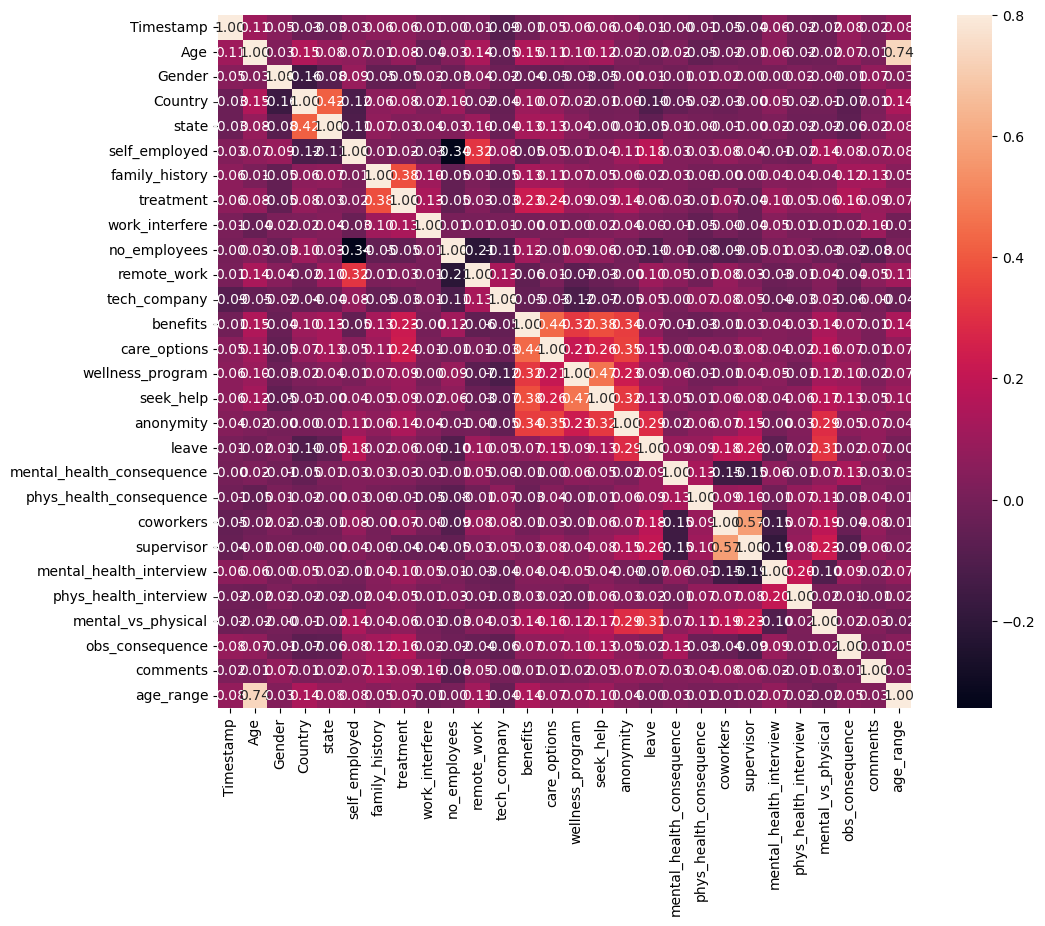

In [16]:
# Display correlation matrix to identify important features 
corrmat = train_df.corr()
plt.figure(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True, fmt='.2f')
plt.show()

C:\Users\nujoodk\AppData\Local\Temp\ipykernel_31204\3505845227.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df["Age"], bins=24)
C:\Users\nujoodk\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\nujoodk\ana

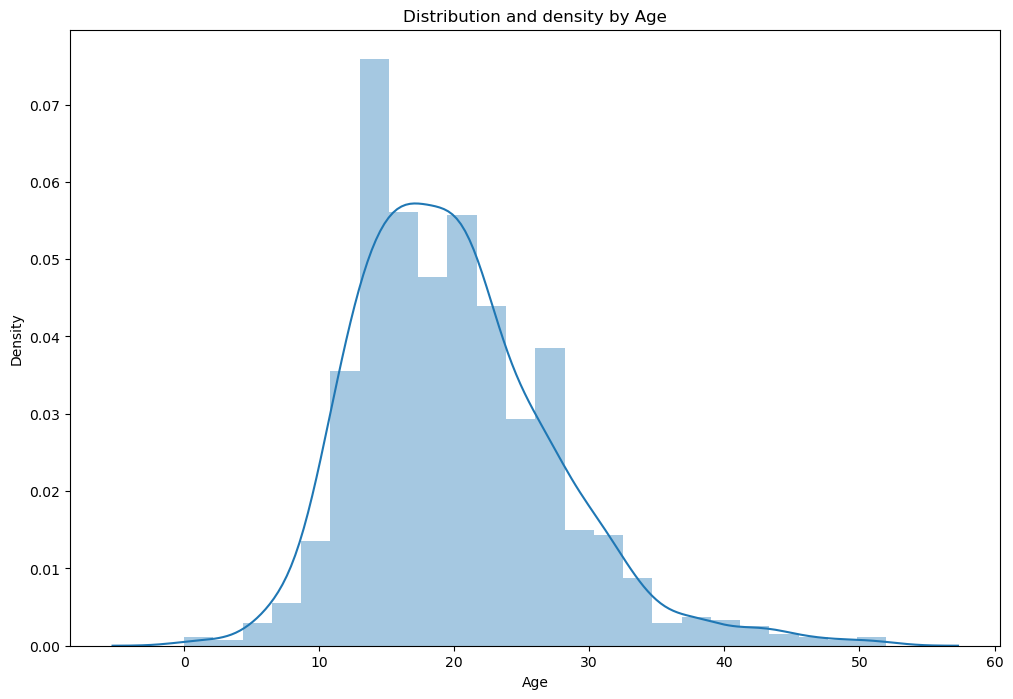

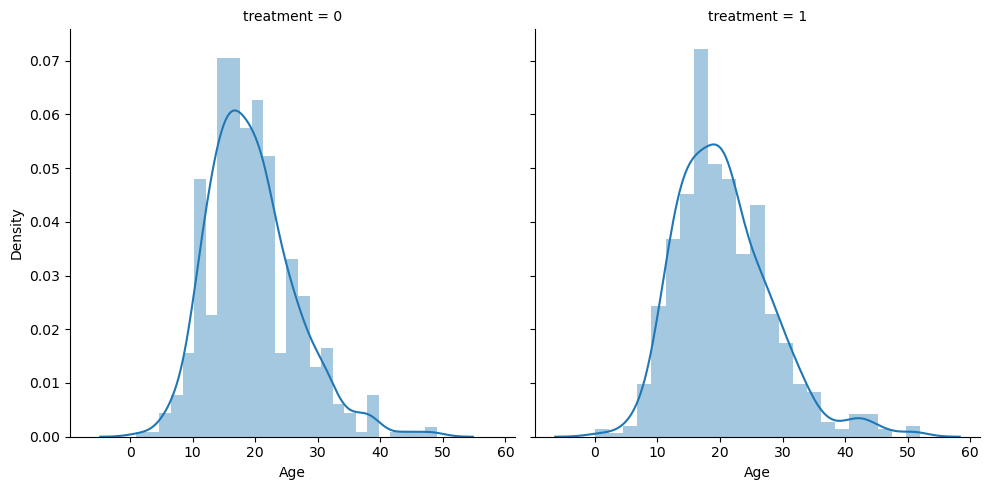

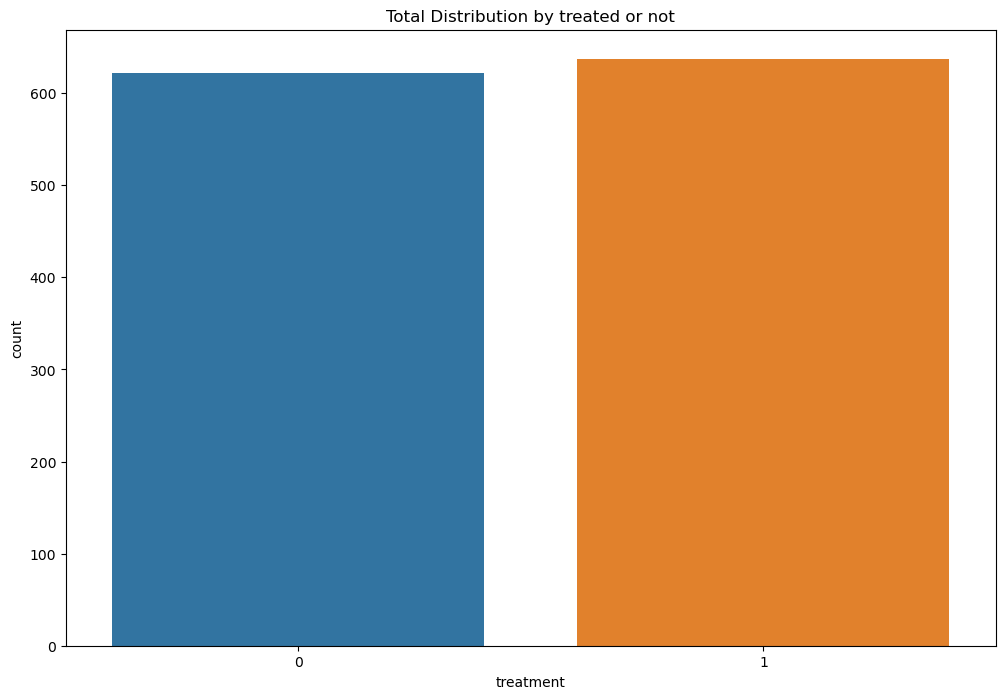

In [64]:
# Visualize the distribution of Age
plt.figure(figsize=(12, 8))
sns.distplot(train_df["Age"], bins=24)
plt.title("Distribution and density by Age")
plt.xlabel("Age")

# Plot Age distribution by treatment
j = sns.FacetGrid(train_df, col='treatment', height=5)
j = j.map(sns.distplot, "Age")
plt.show()

# Countplot for 'treatment'
plt.figure(figsize=(12, 8))
sns.countplot(x="treatment", data=train_df, hue_order=[1, 0])
plt.title('Total Distribution by treated or not')
plt.show()



In [60]:


# Separating features and target variable
X = train_df.drop('treatment', axis=1) 
y = train_df['treatment']

# Using SelectKBest with mutual_info_classif for feature selection
k_best = 8 
random_seed = 42  
selector = SelectKBest(score_func=mutual_info_classif, k=k_best)
X_selected = selector.fit_transform(X, y)

# Getting selected feature names
selected_features = X.columns[selector.get_support()]

print("Selected Features:", selected_features)

Selected Features: Index(['family_history', 'work_interfere', 'benefits', 'care_options',
       'phys_health_interview', 'obs_consequence', 'comments', 'age_range'],
      dtype='object')


In [61]:
selected_features_df = train_df[selected_features]

#using only selected features as input features  
X_selected = selected_features_df



In [62]:

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.30, random_state=0)


In [66]:
# creating a function for evaluating each classification model (using test and train data)
def evalClassModel(model, X_train, y_train, X_test, y_test,classifier_name='', plot=False):
    # Predict the class labels for the training and test sets
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Calculating accuracy for training and test sets
    accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
    accuracy_test = metrics.accuracy_score(y_test, y_pred_test)
    
    print(f"Evaluating {classifier_name} Classifier:")
    # printing all metrics for TRAIN DATA 
    print('Training Set Metrics:')
    print('Accuracy:', accuracy_train)
    print('Null accuracy:', y_train.value_counts().head(1) / len(y_train))
    print('Percentage of ones:', y_train.mean())
    print('Percentage of zeros:', 1 - y_train.mean())
    print('Confusion matrix:')
    print(metrics.confusion_matrix(y_train, y_pred_train))
    print('Classification Report:')
    print(metrics.classification_report(y_train, y_pred_train))
    
    # FOR TEST DATA
    print('\nTest Set Metrics:')
    print('Accuracy:', accuracy_test)
    print('Null accuracy:', y_test.value_counts().head(1) / len(y_test))
    print('Percentage of ones:', y_test.mean())
    print('Percentage of zeros:', 1 - y_test.mean())
    print('Confusion matrix:')
    print(metrics.confusion_matrix(y_test, y_pred_test))
    print('Classification Report:')
    print(metrics.classification_report(y_test, y_pred_test))
    
   #If we want to plot ROC curve for the classification model, we pass parameter true
    # We use roc to check the performance of classification model to understand which one is better 
        #A model with high  AUC indicates better performance in classifying
    if plot:
        
        #FOR TEST DATA
        # Calculating predicted probabilities for the positive class on the test set
        y_pred_prob_test = model.predict_proba(X_test)[:, 1]
        
        # Calculating the False Positive Rate (fpr), True Positive Rate (tpr), and thresholds for the ROC curve
        fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob_test)
        
        # Plot the ROC curve for the test set
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', label='ROC curve (Test Set)')
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve (Test Set)')
        plt.legend(loc='lower right')
        plt.show()
        
        #FOR TRAIN DATA
       # Calculate the False Positive Rate (fpr), True Positive Rate (tpr), and thresholds for the ROC curve
        fpr_train, tpr_train, thresholds_train = metrics.roc_curve(y_train, y_pred_prob_train)
        
        # Plot the ROC curve for the training set
        plt.figure()
        plt.plot(fpr_train, tpr_train, color='green', label='ROC curve (Training Set)')
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve (Training Set)')
        plt.legend(loc='lower right')
        plt.show() 


Evaluating Random Forest Classifier:
Training Set Metrics:
Accuracy: 0.771850170261067
Null accuracy: 1    0.507378
Name: treatment, dtype: float64
Percentage of ones: 0.5073779795686719
Percentage of zeros: 0.4926220204313281
Confusion matrix:
[[317 117]
 [ 84 363]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.73      0.76       434
           1       0.76      0.81      0.78       447

    accuracy                           0.77       881
   macro avg       0.77      0.77      0.77       881
weighted avg       0.77      0.77      0.77       881


Test Set Metrics:
Accuracy: 0.7301587301587301
Null accuracy: 1    0.502646
Name: treatment, dtype: float64
Percentage of ones: 0.5026455026455027
Percentage of zeros: 0.4973544973544973
Confusion matrix:
[[131  57]
 [ 45 145]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.70      0.72       188
           1       0.

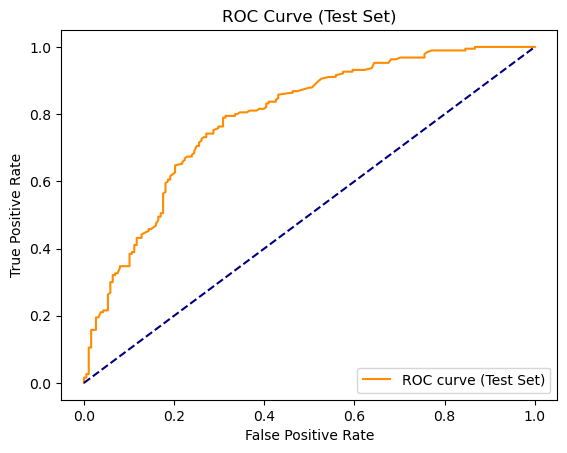

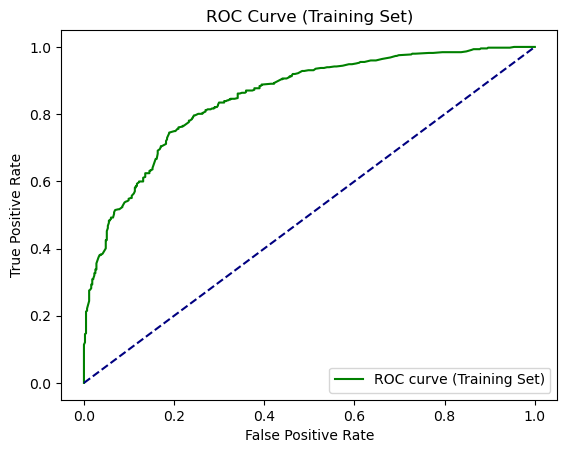

In [68]:
# Random Forest Classifier
forest_model = RandomForestClassifier(max_depth=None, min_samples_leaf=8, min_samples_split=2, n_estimators=20,
                                      random_state=1)
forest_model.fit(X_train, y_train)

# Predict probabilities for the training set
y_pred_prob_train = forest_model.predict_proba(X_train)[:, 1]

# Evaluate Random Forest Classifier
evalClassModel(forest_model, X_train, y_train, X_test, y_test, classifier_name="Random Forest", plot=True)


C:\Users\nujoodk\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Evaluating AdaBoost Classifier:
Training Set Metrics:
Accuracy: 0.7979568671963677
Null accuracy: 1    0.507378
Name: treatment, dtype: float64
Percentage of ones: 0.5073779795686719
Percentage of zeros: 0.4926220204313281
Confusion matrix:
[[339  95]
 [ 83 364]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.78      0.79       434
           1       0.79      0.81      0.80       447

    accuracy                           0.80       881
   macro avg       0.80      0.80      0.80       881
weighted avg       0.80      0.80      0.80       881


Test Set Metrics:
Accuracy: 0.7142857142857143
Null accuracy: 1    0.502646
Name: treatment, dtype: float64
Percentage of ones: 0.5026455026455027
Percentage of zeros: 0.4973544973544973
Confusion matrix:
[[132  56]
 [ 52 138]]
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.70      0.71       188
           1       0.71  

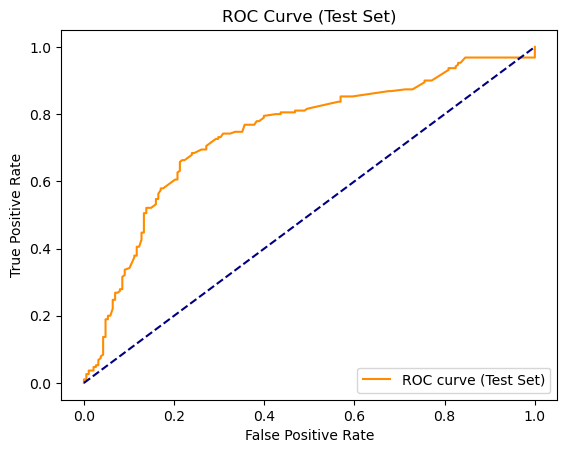

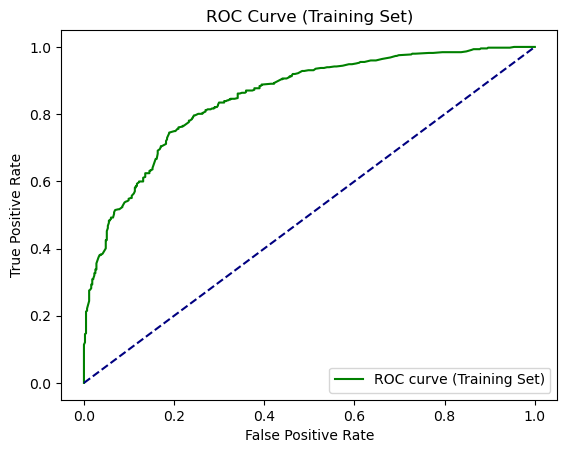

In [69]:
# AdaBoost Classifier 
adaboost_model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy', max_depth=1),
                                    n_estimators=500)
adaboost_model.fit(X_train, y_train)

# Evaluate AdaBoost Classifier
evalClassModel(adaboost_model, X_train, y_train, X_test, y_test, classifier_name="AdaBoost", plot=True)


Evaluating KNN Classifier:
Training Set Metrics:
Accuracy: 0.720771850170261
Null accuracy: 1    0.507378
Name: treatment, dtype: float64
Percentage of ones: 0.5073779795686719
Percentage of zeros: 0.4926220204313281
Confusion matrix:
[[321 113]
 [133 314]]
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.74      0.72       434
           1       0.74      0.70      0.72       447

    accuracy                           0.72       881
   macro avg       0.72      0.72      0.72       881
weighted avg       0.72      0.72      0.72       881


Test Set Metrics:
Accuracy: 0.7116402116402116
Null accuracy: 1    0.502646
Name: treatment, dtype: float64
Percentage of ones: 0.5026455026455027
Percentage of zeros: 0.4973544973544973
Confusion matrix:
[[139  49]
 [ 60 130]]
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.74      0.72       188
           1       0.73      0.

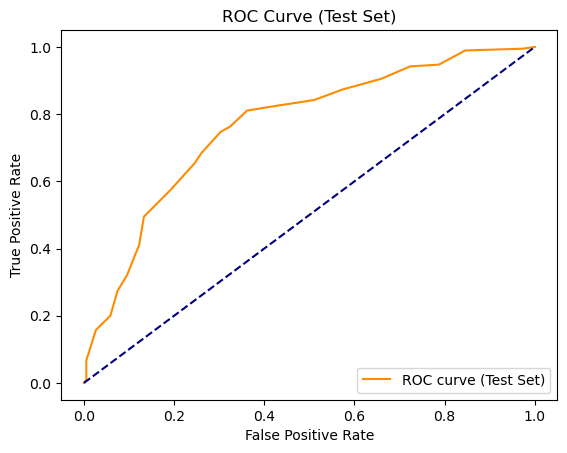

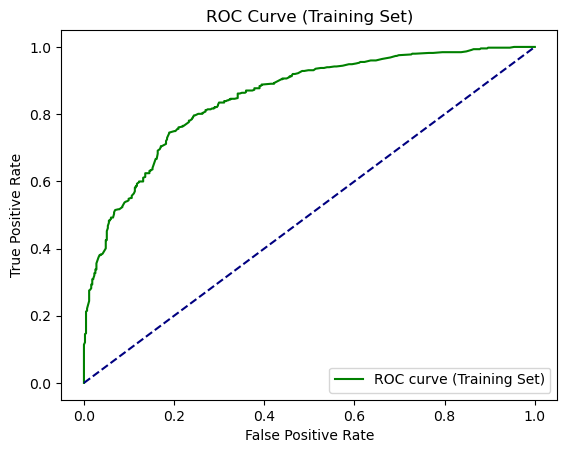

In [70]:
# K-Nearest Neighbors (KNN) Classifier
knn_model = KNeighborsClassifier(n_neighbors=27, weights='uniform')
knn_model.fit(X_train, y_train)

# Evaluate KNN Classifier
evalClassModel(knn_model, X_train, y_train, X_test, y_test, classifier_name="KNN", plot=True)


Evaluating Decision Tree Classifier:
Training Set Metrics:
Accuracy: 0.7502837684449489
Null accuracy: 1    0.507378
Name: treatment, dtype: float64
Percentage of ones: 0.5073779795686719
Percentage of zeros: 0.4926220204313281
Confusion matrix:
[[322 112]
 [108 339]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.74      0.75       434
           1       0.75      0.76      0.76       447

    accuracy                           0.75       881
   macro avg       0.75      0.75      0.75       881
weighted avg       0.75      0.75      0.75       881


Test Set Metrics:
Accuracy: 0.7248677248677249
Null accuracy: 1    0.502646
Name: treatment, dtype: float64
Percentage of ones: 0.5026455026455027
Percentage of zeros: 0.4973544973544973
Confusion matrix:
[[135  53]
 [ 51 139]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.72      0.72       188
           1       0

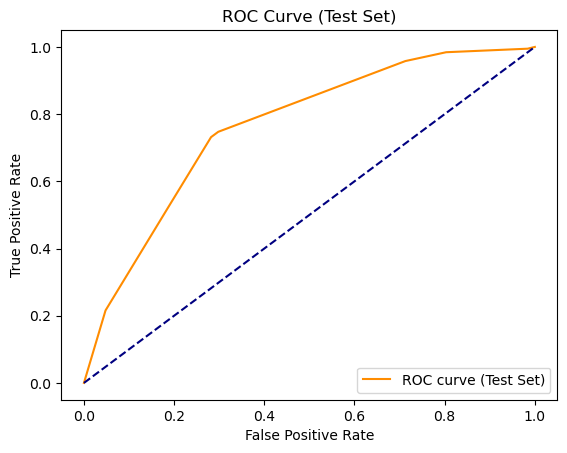

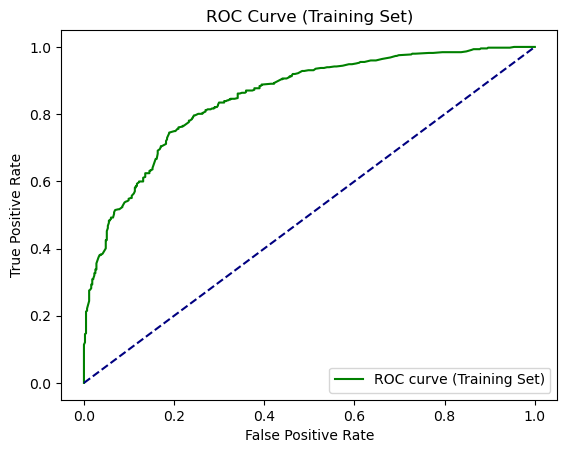

In [71]:
# Decision Tree Classifier
tree_model = DecisionTreeClassifier(max_depth=3, min_samples_split=8, max_features=6, criterion='entropy',
                                     min_samples_leaf=7)
tree_model.fit(X_train, y_train)

# Evaluate Decision Tree Classifier
evalClassModel(tree_model, X_train, y_train, X_test, y_test, classifier_name="Decision Tree", plot=True)


In [78]:
# Neural Network 

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define and compile the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')  
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adagrad(learning_rate=0.1),
              loss='sparse_categorical_crossentropy',  
              metrics=['accuracy'])

# Train the model
batch_size = 32
epochs = 10
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val))

# Make predictions from the trained model 
y_pred = model.predict(X_test)



Epoch 1/10
8/8 [==============================] - 1s 22ms/step - loss: 1.0432 - accuracy: 0.5565 - val_loss: 0.6778 - val_accuracy: 0.6207
Epoch 2/10
8/8 [==============================] - 0s 4ms/step - loss: 0.7366 - accuracy: 0.5217 - val_loss: 0.7937 - val_accuracy: 0.3966
Epoch 3/10
8/8 [==============================] - 0s 5ms/step - loss: 0.7065 - accuracy: 0.5000 - val_loss: 0.6820 - val_accuracy: 0.5517
Epoch 4/10
8/8 [==============================] - 0s 4ms/step - loss: 0.6896 - accuracy: 0.5739 - val_loss: 0.6985 - val_accuracy: 0.6724
Epoch 5/10
8/8 [==============================] - 0s 4ms/step - loss: 0.6873 - accuracy: 0.5957 - val_loss: 0.6578 - val_accuracy: 0.6897
Epoch 6/10
8/8 [==============================] - 0s 4ms/step - loss: 0.6787 - accuracy: 0.6348 - val_loss: 0.6711 - val_accuracy: 0.6379
Epoch 7/10
8/8 [==============================] - 0s 4ms/step - loss: 0.6728 - accuracy: 0.6174 - val_loss: 0.6420 - val_accuracy: 0.7069
Epoch 8/10
8/8 [=================

In [81]:
#Evaluate NN model
eval_result = model.evaluate(X_test, y_test)
print('Test set accuracy: {accuracy:0.2f}'.format(accuracy=eval_result[1]))

 

12/12 [==============================] - 0s 564us/step - loss: 0.6436 - accuracy: 0.6429
Test set accuracy: 0.64
12/12 [==============================] - 0s 913us/step


,index,prediction,expected
5,5,1,0
494,494,0,0
52,52,0,0
986,986,1,0
186,186,0,0


In [ ]:
Based on the accuracy score , adaboost has the highest score , so we used that in our frontend .